# Similar Heatmaps

## Question 
Hi @geoff_langenderfer, wondering if you could help with this:                             My part 2 heat map looks the same as the part 1 heat map...I used the code from the example...wondering where I went wrong. I should preface this query with I am not a coding expert by a long shot :-).  Here is my code for part 2:

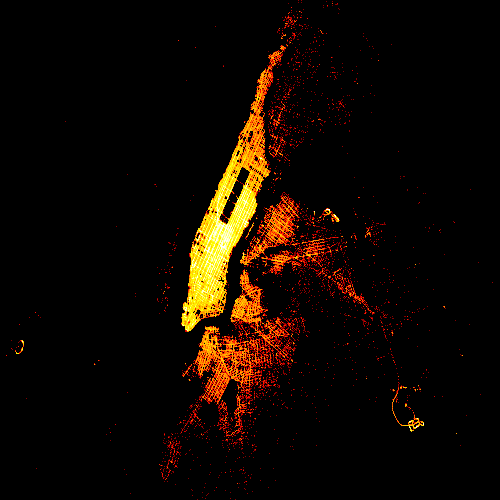

In [6]:
#datashader allows us to handle data with many rows, like NYC Taxi it uses 
#bokeh for plotting functionality

import datashader as ds
from datashader.colors import Hot
from datashader import transfer_functions as tf
import numpy as np
import pandas as pd

#load NYC Taxi train data
df = pd.read_csv('train.csv')

plot_height, plot_width = int(500), int(500)

x_range, y_range = ((-74.2,-73.7), (40.6, 40.9)) 

#sets up frame for plot, analogous to plt.figure
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range) 

#plots dropoff lat/long and sums passenger_count for all points in each pixel
agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude',  ds.count('passenger_count')) 

#-----------------Your code here------------------------------#

#fill in the call to agg.where to show 90th percentile or greater dropoffs
tf.set_background(tf.shade(agg.where(agg>np.percentile(agg,90)), 
                  cmap=Hot, how='eq_hist'),"black")

## Answer
The main difference between the two is the number of datapoints used. Think
about going through each ride and placing a dot where the dropoff occurred on
the map: Manhattan and other popular boroughs will appear brighter on the map.

In [4]:
import datashader as ds
from datashader.colors import Hot
from datashader import transfer_functions as tf
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
rows = df.shape[0]
print("Total taxi rides:            ", rows)
print("90th+ percentiles taxi rides: ", 0.1*rows)

Total taxi rides:             1458644
90th+ percentiles taxi rides:  145864.4


As Jay pointed out, you can see a stronger difference by bumping up the
percentile. For example, if we only graph the 99th+ percentiles (top 1% of
dropoff locations), it will look much sparser:

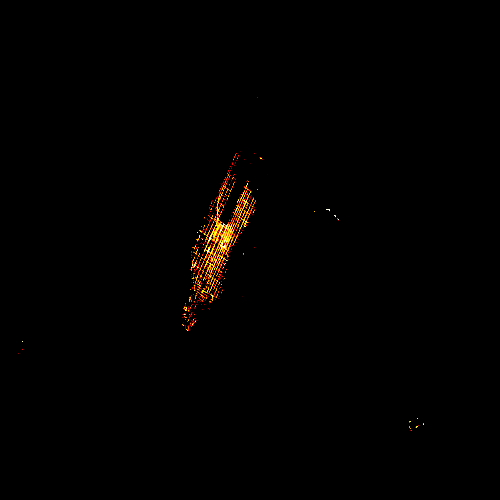

In [5]:
plot_height, plot_width = int(500), int(500)

x_range, y_range = ((-74.2,-73.7), (40.6, 40.9)) 

cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, 
                x_range=x_range, y_range=y_range) 

agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude',  
                 ds.count('passenger_count')) 

tf.set_background(tf.shade(agg.where(agg>np.percentile(agg,99)), 
                  cmap=Hot, how='eq_hist'),"black")